In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import phik
from phik.report import plot_correlation_matrix

# <b><u>Набор данных: salary:</u></b>

In [3]:
sal_df = pd.read_csv('salary_dataset.csv', index_col = 0)
sal_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


Делаем копию дата-фрейма, чтобы не портить исходный:

In [5]:
sal_edt_df = sal_df.copy()

## <u>Обработаем полученный набор данных:<mu>

Смотрим параметры набора данных:

In [8]:
sal_edt_df.shape

(6704, 8)

In [9]:
print(sal_edt_df.info())
sal_edt_df.mode()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB
None


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,27.0,Male,Bachelor's Degree,Software Engineer,2.0,140000.0,USA,White


Выведем количество пустых значений:

In [11]:
nan_values = sal_edt_df.isna().sum()
nan_values[nan_values.values != 0]

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

## <i><u>Однофакторный анализ:</u></i>

Определим базовые статистики по столбцам с не прерывными значениями:

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sal_edt_df.describe()

,Age,Years of Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


<u>Построим графики:</u>

In [16]:
sns.set_theme()

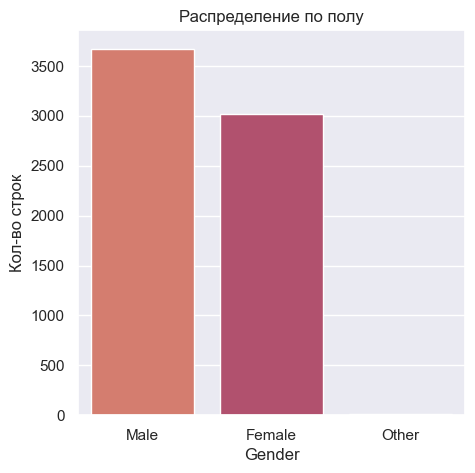

In [17]:
plt.figure(figsize = [5, 5])
plt.title('Распределение по полу')
plt.ylabel('Кол-во строк')
sns.countplot(data = sal_edt_df, x = 'Gender', hue = 'Gender', legend = False, palette = 'flare')
plt.show()

Доля мужчин и женщин в наборе приблизительно одинаковое.

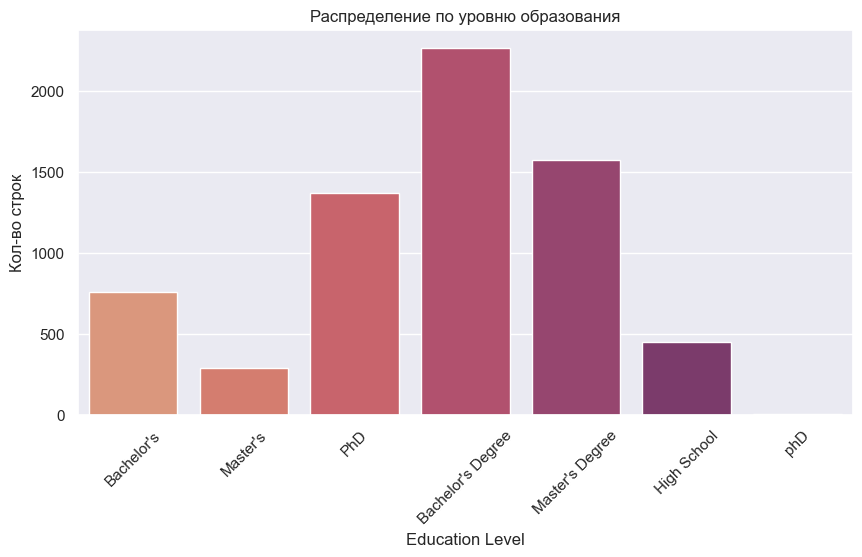

In [19]:
plt.figure(figsize = [10, 5])
plt.xticks(rotation = 45)
plt.title('Распределение по уровню образования')
plt.ylabel('Кол-во строк')
sns.countplot(data = sal_edt_df, x = 'Education Level', hue = 'Education Level', legend = False, palette = 'flare')
plt.show()

<tr>Заметим, что часть значений дублируется:
    <li>- Bachelor's Degree → Bachelor's</li>
    <li>- Master's Degree → Master's</li>
    <li>- phD → PhD</li>
</tr>
Стандартизуем наименования уровня образования.

In [21]:
sal_edt_df['Education Level'] = sal_edt_df['Education Level'].str\
                                            .replace("Bachelor's Degree", "Bachelor's")\
                                            .replace("Master's Degree", "Master's")\
                                            .replace("phD", "PhD")

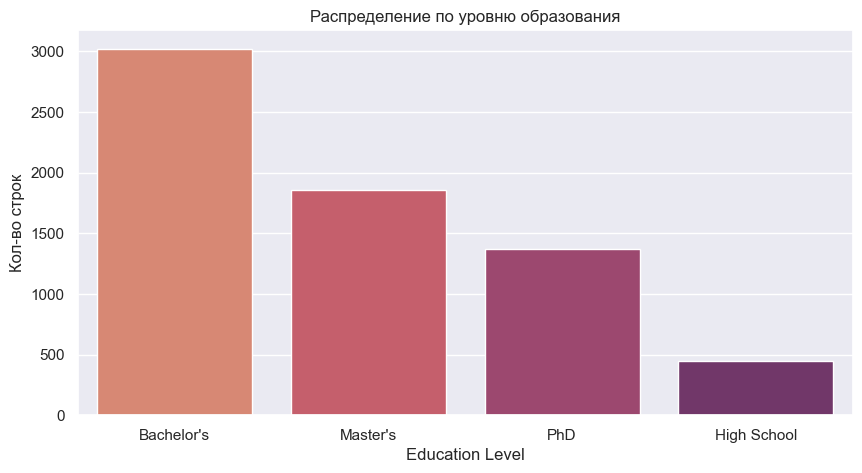

In [22]:
plt.figure(figsize = [10, 5])
plt.title('Распределение по уровню образования')
plt.ylabel('Кол-во строк')
sns.countplot(data = sal_edt_df, x = 'Education Level', hue = 'Education Level', legend = False, palette = 'flare')
plt.show()

Самая распространенная группа - люди с дипломом бакалавра.

Посмотрим кол-во различных наименований должностей в наборе данных:

In [25]:
sal_edt_df['Job Title'].nunique()

193

Т.к. их кол-во довольно велико, выведем 10 самых распространенных:

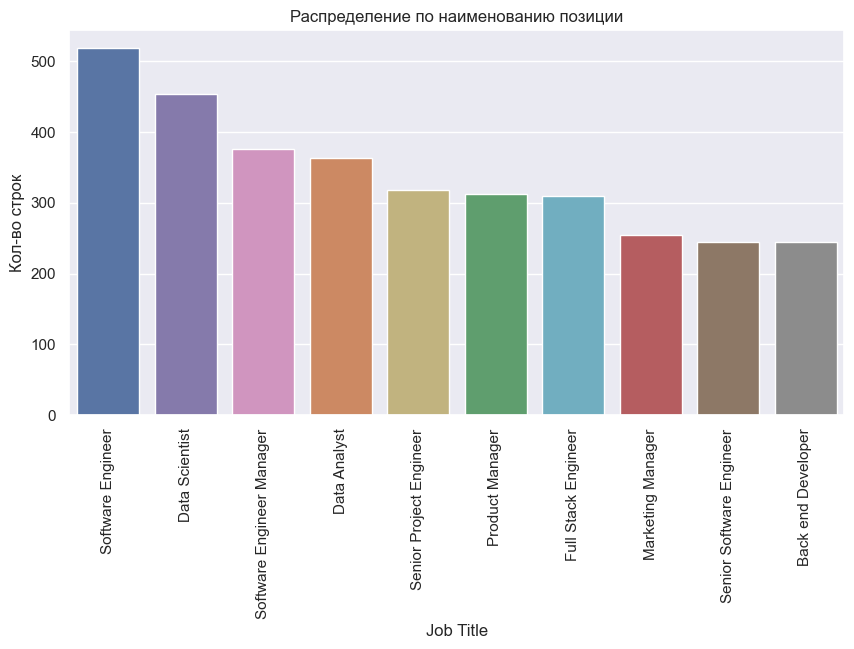

In [27]:
df = sal_edt_df[sal_edt_df['Job Title'].isin(sal_edt_df['Job Title'].value_counts().head(10).index)]
plt.figure(figsize = [10, 5])
plt.xticks(rotation = 90)
plt.title('Распределение по наименованию позиции')
plt.ylabel('Кол-во строк')
sns.countplot(data = df, x = 'Job Title', hue = 'Job Title', legend = False, order = df['Job Title'].value_counts().index)
plt.show()

Видно, что набор данных содержит преимущественно информацию по IT-сфере.

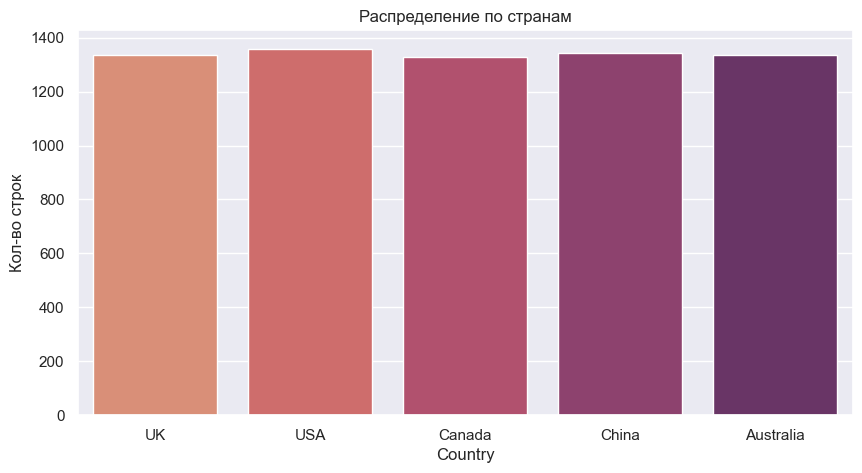

In [29]:
plt.figure(figsize = [10, 5])
plt.title('Распределение по странам')
plt.ylabel('Кол-во строк')
sns.countplot(data = sal_edt_df, x = 'Country', hue = 'Country', legend = False, palette = 'flare')
plt.show()

Распределение по странам практически одинаковое.

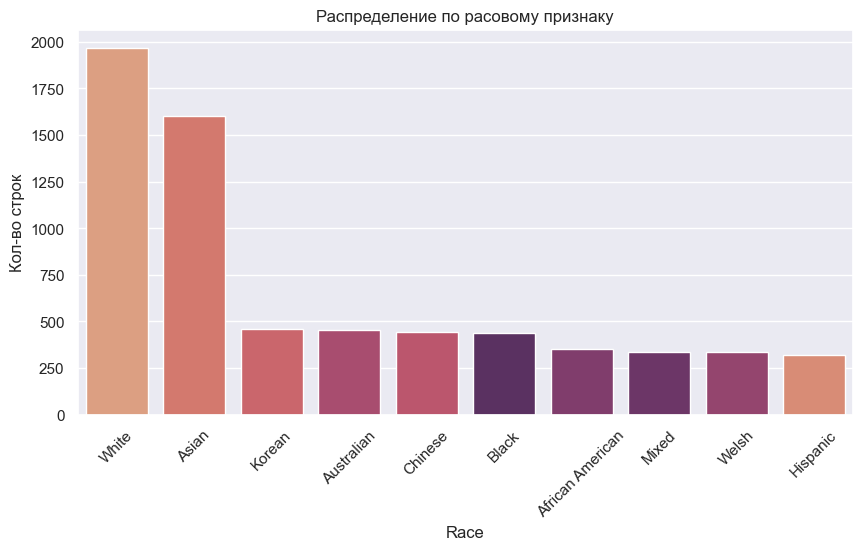

In [31]:
plt.figure(figsize = [10, 5])
plt.xticks(rotation = 45)
plt.title('Распределение по расовому признаку')
plt.ylabel('Кол-во строк')
sns.countplot(data = sal_edt_df, x = 'Race', hue = 'Race', legend = False, palette = 'flare', order = sal_edt_df['Race'].value_counts().index)
plt.show()

Видно, что большая часть данных представлена по зарплатам людей белой и азиатской расовой принадлежности.

### <u>Посмотрим на распределение данных:</u>

Построим графики распределения по непрерывным значениям и посчитаем основные статистики для них:

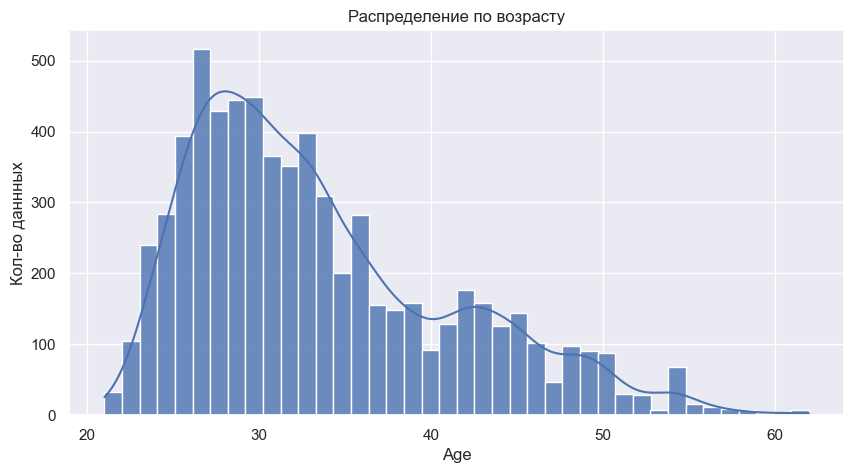

In [35]:
plt.figure(figsize = [10, 5])
plt.title('Распределение по возрасту')
plt.ylabel('Кол-во даннных')
s = sns.histplot(data = sal_edt_df, x = 'Age', bins = 40, alpha = 0.8, kde = True)
plt.show()

In [36]:
print(sal_edt_df.describe()['Age'])
print(f"\nМода = {sal_edt_df['Age'].mode()[0]}")

count   6702.00
mean      33.62
std        7.61
min       21.00
25%       28.00
50%       32.00
75%       38.00
max       62.00
Name: Age, dtype: float64

Мода = 27.0


Распределение по возрасту похоже на нормальное. Среднее значение и медиана в районе 33 лет.

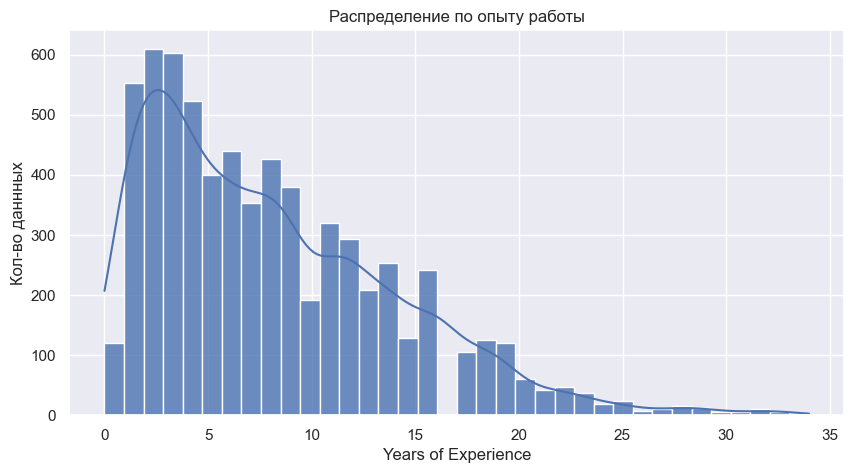

In [38]:
plt.figure(figsize = [10, 5])
plt.title('Распределение по опыту работы')
plt.ylabel('Кол-во даннных')
s = sns.histplot(data = sal_edt_df, x = 'Years of Experience', alpha = 0.8, kde = True)
plt.show()

In [39]:
print(sal_edt_df.describe()['Years of Experience'])
print(f"\nМода = {sal_edt_df['Years of Experience'].mode()[0]}")

count   6701.00
mean       8.09
std        6.06
min        0.00
25%        3.00
50%        7.00
75%       12.00
max       34.00
Name: Years of Experience, dtype: float64

Мода = 2.0


Распределение нормальное со смещением вправо. Наблюдается снижение количества работников с опытом работы более 2х лет.

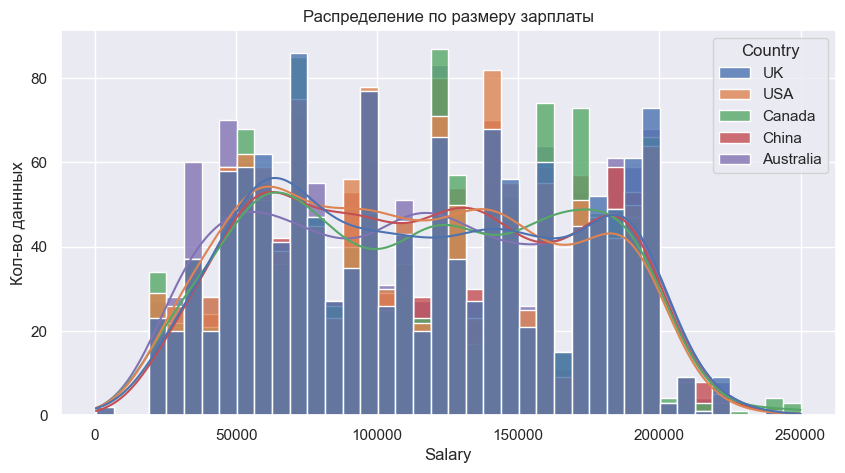

In [41]:
plt.figure(figsize = [10, 5])
plt.title('Распределение по размеру зарплаты')
plt.ylabel('Кол-во даннных')
s = sns.histplot(data = sal_edt_df, x = 'Salary', hue = 'Country', bins = 40, alpha = 0.8, kde = True)
plt.show()

Судя по тому, что графики по странам лежат приблизительно в одном диапазоне, размер зарплат в наборе данных указан в пересчете на какую-то эталонную валюту.

In [43]:
print(sal_edt_df.describe()['Salary'])
print(f"\nМода = {sal_edt_df['Salary'].mode()[0]}")

count     6699.00
mean    115326.96
std      52786.18
min        350.00
25%      70000.00
50%     115000.00
75%     160000.00
max     250000.00
Name: Salary, dtype: float64

Мода = 140000.0


Распределение по уровню зарплаты не похоже на нормальное распределение. Видны 3 вершины: 65K, 135K, 185K. В связи с тем, что распределение не нормальное, статистики на графике и расчетные не совпадают

## <i><u>Двуфакторный анализ:</u></i>

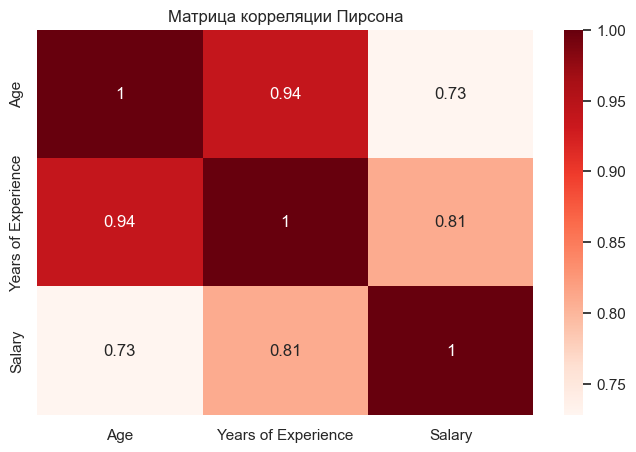

In [46]:
corr_matrix_pearson = sal_edt_df[['Age', 'Years of Experience', 'Salary']].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

<tr>Из матрицы корелляции Пирсона видно, что:
<li>- опыт наиболее зависит от возраста, что логично</li>
<li>- уровень зарплаты зависит в большей мере от опыта, чем от возраста;</li>
</tr>
Посмотрим на взаимосвязь показателей в наборе данных:

Для начала напишем функцию отрисовки графиков взаимосвязи между различными показателями:

In [49]:
def plot_scatter(ax,
                 df, x, y,
                 xlabel = None, ylabel = None,
                 title = None, 
                 hue = None, palette = None,
                 legend = False
                ):
    '''
    Функция рисования графика для двухфакторного анализа. Показывает взаимосвязь между двумя атрибутами набора данных.
    '''
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    s = sns.scatterplot(data = df, x = x, y = y, hue = hue, legend = legend, palette = palette, ax = ax)
    return ax.plot()

Далее необходимо понять, в каких данных есть выбросы. Для этого построим матрицу графиков по непрерывным переменным:

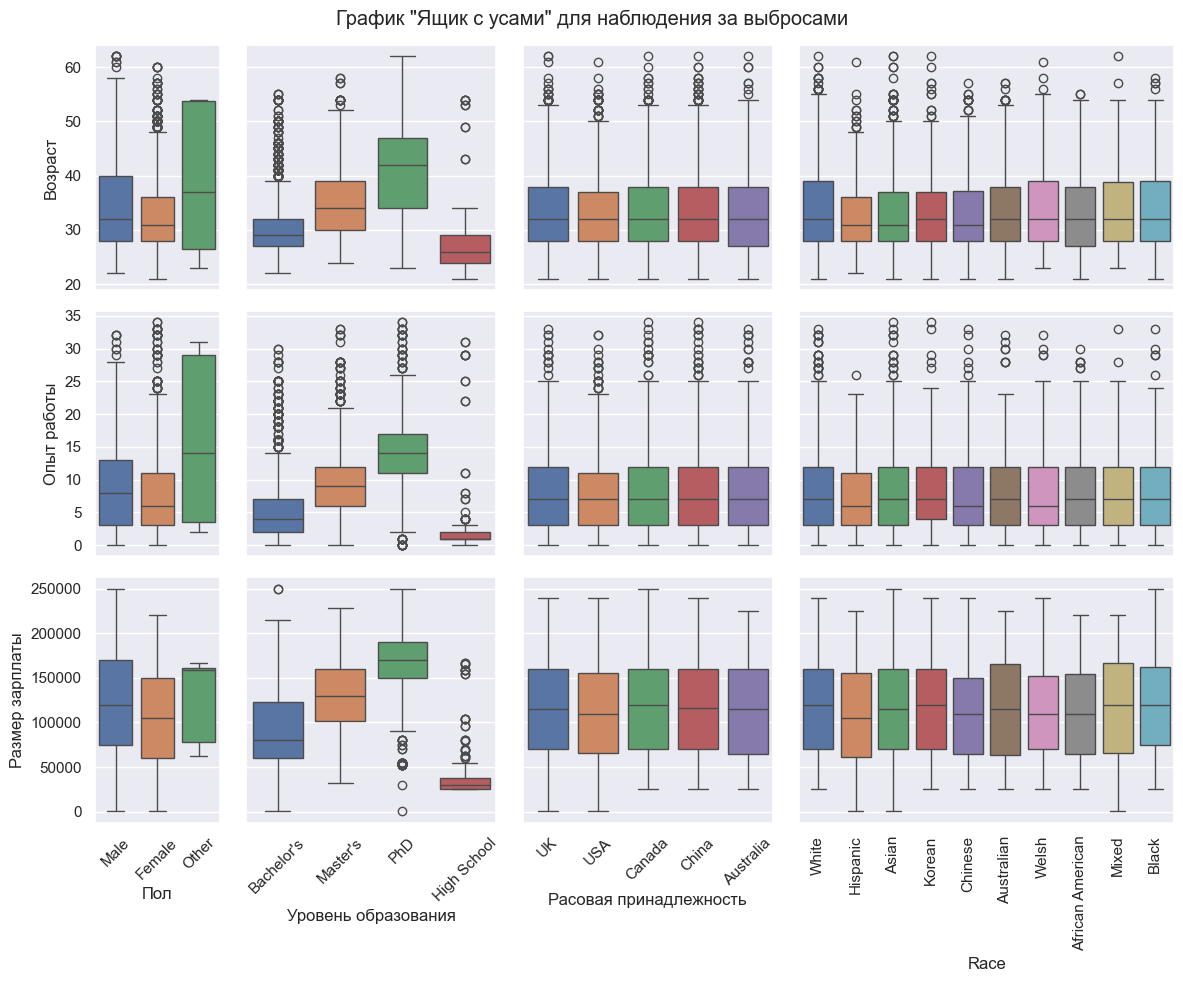

In [51]:
fig, ax = plt.subplots(3, 4, figsize = (12, 10), sharex = 'col', sharey = 'row', layout = 'tight', width_ratios = [1, 2, 2, 3])

fig.suptitle('График "Ящик с усами" для наблюдения за выбросами')

sns.boxplot(data = sal_edt_df, x = 'Gender', y = 'Age', hue = 'Gender', legend = False, ax = ax[0, 0])
sns.boxplot(data = sal_edt_df, x = 'Gender', y = 'Years of Experience', hue = 'Gender', legend = False, ax = ax[1, 0])
sns.boxplot(data = sal_edt_df, x = 'Gender', y = 'Salary', hue = 'Gender', legend = False, ax = ax[2, 0])

sns.boxplot(data = sal_edt_df, x = 'Education Level', y = 'Age', hue = 'Education Level', legend = False, ax = ax[0, 1])
sns.boxplot(data = sal_edt_df, x = 'Education Level', y = 'Years of Experience', hue = 'Education Level', legend = False, ax = ax[1, 1])
sns.boxplot(data = sal_edt_df, x = 'Education Level', y = 'Salary', hue = 'Education Level', legend = False, ax = ax[2, 1])

sns.boxplot(data = sal_edt_df, x = 'Country', y = 'Age', hue = 'Country', legend = False, ax = ax[0, 2])
sns.boxplot(data = sal_edt_df, x = 'Country', y = 'Years of Experience', hue = 'Country', legend = False, ax = ax[1, 2])
sns.boxplot(data = sal_edt_df, x = 'Country', y = 'Salary', hue = 'Country', legend = False, ax = ax[2, 2])

sns.boxplot(data = sal_edt_df, x = 'Race', y = 'Age', hue = 'Race', legend = False, ax = ax[0, 3])
sns.boxplot(data = sal_edt_df, x = 'Race', y = 'Years of Experience', hue = 'Race', legend = False, ax = ax[1, 3])
sns.boxplot(data = sal_edt_df, x = 'Race', y = 'Salary', hue = 'Race', legend = False, ax = ax[2, 3])

ax[2, 0].set_xlabel('Пол')
ax[2, 1].set_xlabel('Уровень образования')
ax[0, 0].set_ylabel('Возраст')
ax[1, 0].set_ylabel('Опыт работы')
ax[2, 0].set_ylabel('Размер зарплаты')

ax[2, 2].set_xlabel('Страна')
ax[2, 2].set_xlabel('Расовая принадлежность')

ax[2, 0].tick_params(axis = 'x', labelrotation = 45)
ax[2, 1].tick_params(axis = 'x', labelrotation = 45)
ax[2, 2].tick_params(axis = 'x', labelrotation = 45)
ax[2, 3].tick_params(axis = 'x', labelrotation = 90)

plt.show()

<tr>Из графиков видно, что ярко выраженные выбросы  есть в атрибутах:
<li>- Возраст;</li>
<li>- Опыт работы;</li>
</tr>
<tr>По размеру зарплаты выбросы можно увидеть только по уровню образования у:
    <li>- школьников (High School);</li>
    <li>- кандидатов наук (PhD);</li>
    <li>- один выброс у бакалавра (Bachelor's);</li>
</tr>

***************

### Построим графики взаимосвязи возраста с размером зарплаты и опытом работы. Выберем различные категориальные разрезы и попытаемся выделить категории людей, по которым есть выбросы:

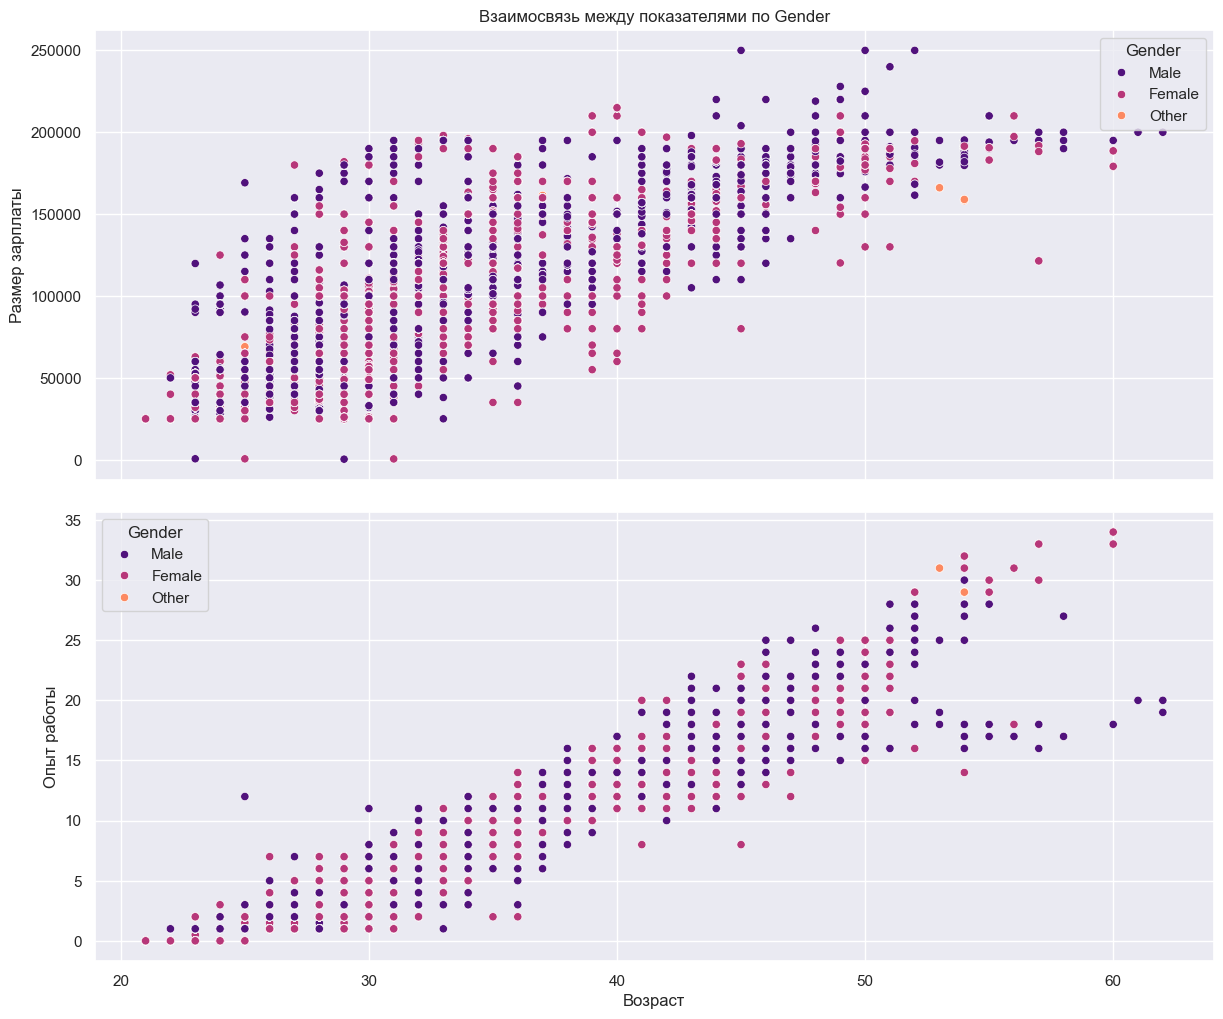

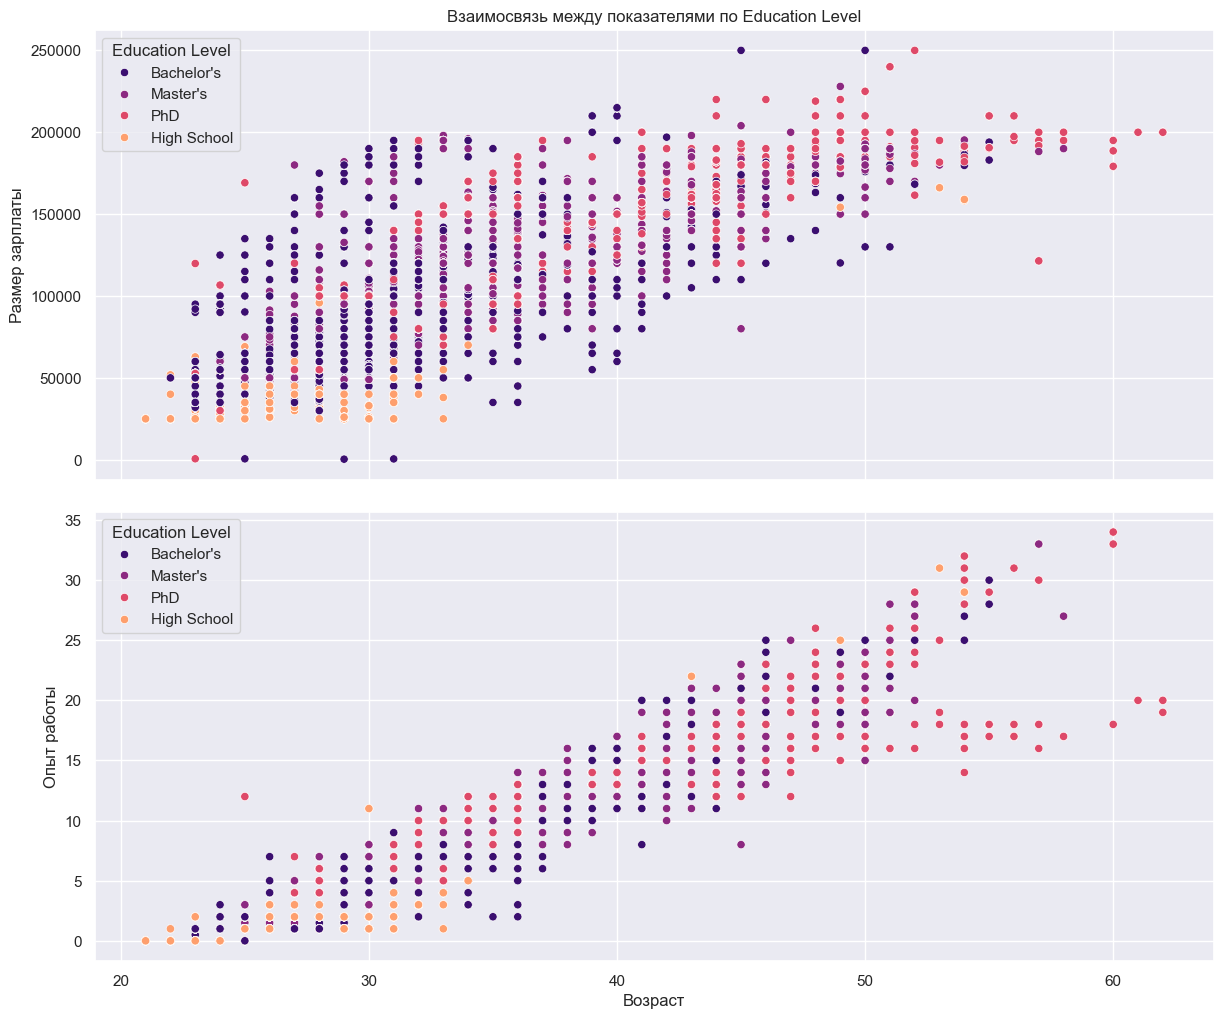

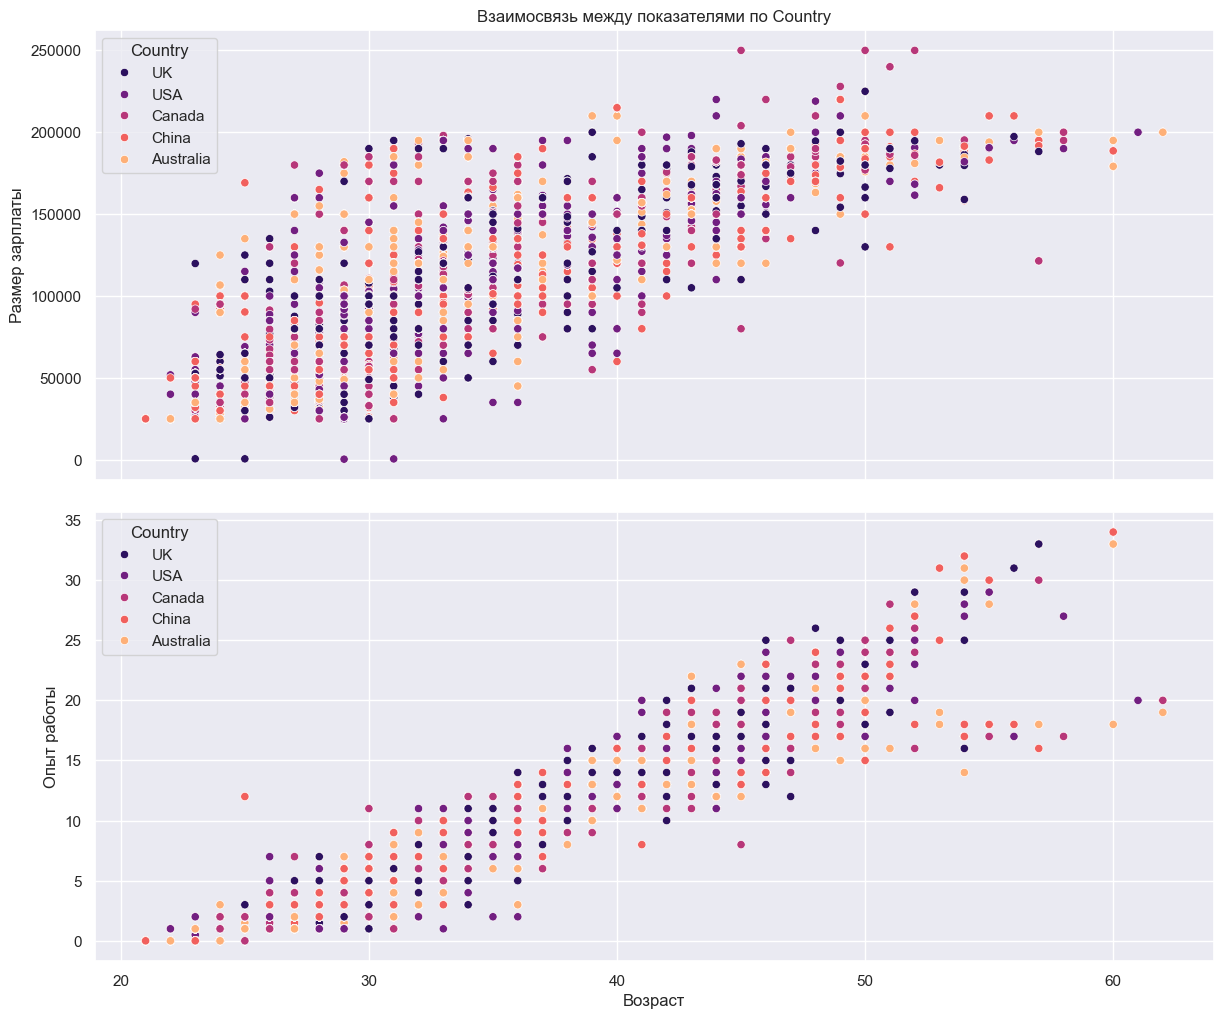

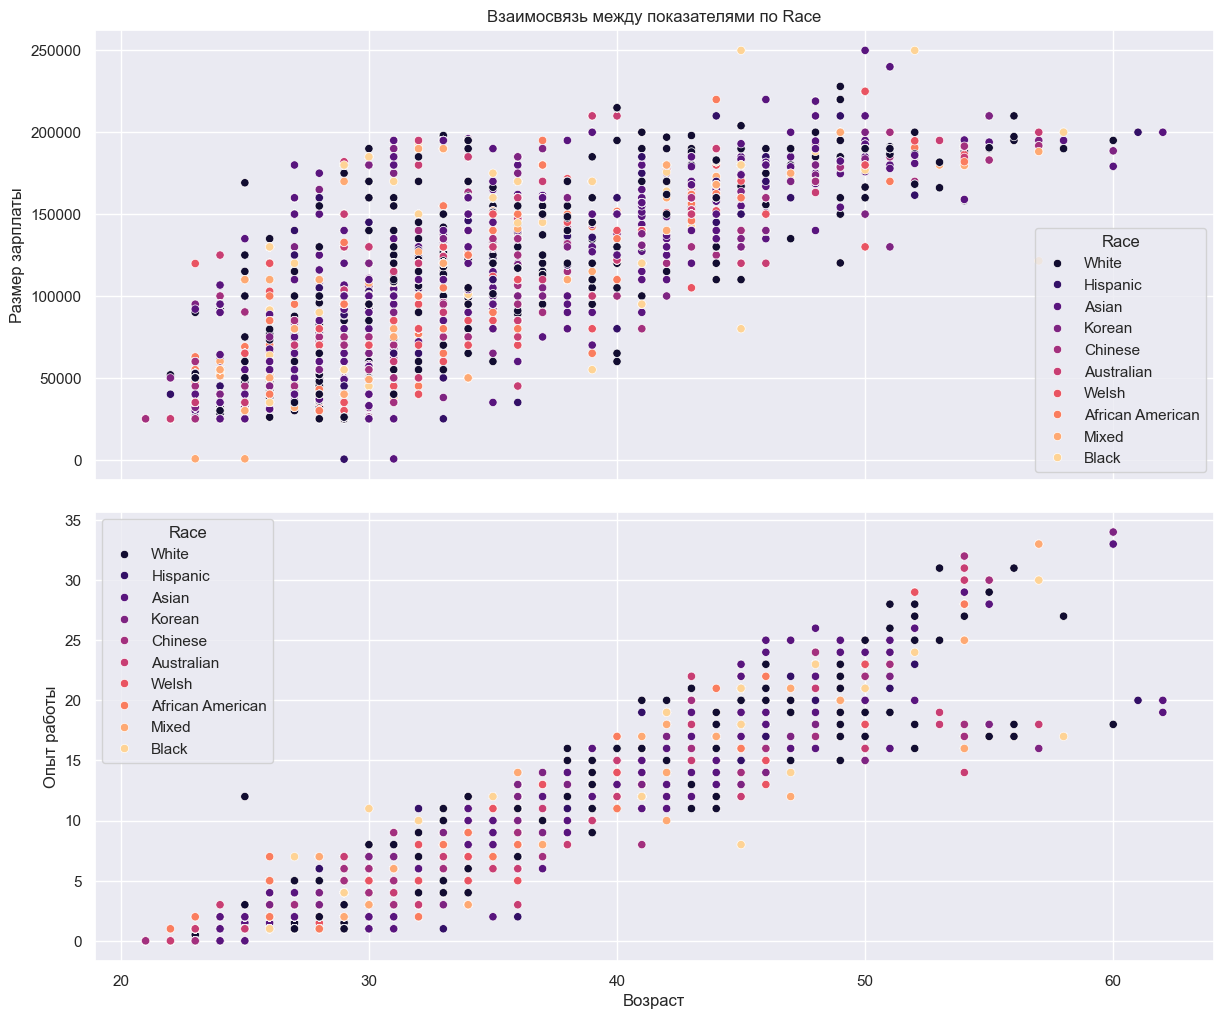

In [55]:
# Gender 	Education Level 	Job Title 	Country 	Race
hue_value = 'Race'
for hue_value in ['Gender', 'Education Level', 'Country', 	'Race']:
    fig, ax = plt.subplots(2, 1, figsize = (12, 10), sharex = 'col')
    fig.tight_layout()
    plot_scatter(ax = ax[0], 
                 df = sal_edt_df, x = 'Age', y = 'Salary',
                 title = f'Взаимосвязь между показателями по {hue_value}',
                 ylabel = 'Размер зарплаты',
                 hue = hue_value, palette = 'magma',
                 legend = True
                )
    plot_scatter(ax = ax[1], 
                 df = sal_edt_df, x = 'Age', y = 'Years of Experience',             
                 xlabel = 'Возраст',
                 ylabel = 'Опыт работы',
                 hue = hue_value, palette = 'magma',
                 legend = True
                )
    plt.show()

<tr>Из последних 3х графиков видно, что:
    <li>- Уровень заработной платы у большинсва людей из набора данных не превышает 200K. За данный отметкой наблюдаются выбросы.</li>
    <li>- Между возрастом, опытом работы существует прямая взаимосвязь. Однако у кандидатов наук (PhD) опыт работы обычно не превышает 20 лет.</li>
</tr>

1. Выбросы по уровню заработной платы наблюдаются у мужчин в возрасте от 44 до 53 лет. Преимущественно с уровнем образования кандидата наук. Разброс по странам и расовой принадлежности равномерный.
2. Как правило мужчины с наличием степени кандидата наук имеют опыт работы не превышающий 20 лет.

## <u>Посмотрим на наличие пропусков в данных:</u>

In [59]:
nan_values = sal_edt_df.isna().sum()
nan_values[nan_values.values != 0]

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Показатели пол, наименование должности заполнить по другим косвенным показателям не представляется возможным. Поэтому оставляем их пустыми.

<tr>Показатель возраста можно было бы предугадать по следующим признакам:
    <li>- опыт работы;</li>
    <li>- уровень образования;</li>
    <li>- страна;</li>
</tr>
Однако, если выбрать записи с не заполненным возрастом, то видно, что в них и другие атрибуты почти все пустые:

In [62]:
sal_edt_df[sal_edt_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White


Поэтому возраст также оставляем пустым.

<tr>Аналогично возрасту, показатель опыта работы можно было бы предугадать по следующим признакам:
    <li>- возраст;</li>
    <li>- уровень образования;</li>
    <li>- страна;</li>
</tr>

In [65]:
sal_edt_df[sal_edt_df['Years of Experience'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
5247,26.00,Female,Bachelor's,Social M,NaN,NaN,USA,White


Видно, что можно заполнить одну пустую строку:

In [67]:
sal_edt_df['Years of Experience'] = sal_edt_df['Years of Experience'].fillna(
    sal_edt_df.groupby(['Age', 'Education Level', 'Country'])['Years of Experience'].transform(lambda x: x.mode()[0] if x.mode().size == 1 else None)
)

<tr>Показатель уровня образования можно предугадать по следующим признакам:
    <li>- страна;</li>
    <li>- должность;</li>
    <li>- опыт работы;</li>
</tr>

In [69]:
sal_edt_df[sal_edt_df['Education Level'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,27.00,Male,NaN,Developer,7.00,100000.00,UK,White


Видно, что также можно заполнить только одно значение. Однако в наборе данных только одна строка с подобными значениями для страны и наименования должности:

In [71]:
sal_edt_df[(sal_edt_df['Country'] == 'UK') & (sal_edt_df['Job Title'] == 'Developer')]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2011,27.00,Male,NaN,Developer,7.00,100000.00,UK,White


Поэтому уровень образования также оставляем пустым.

<tr>Наконец показатель заработной платы можно по следующим признакам:
    <li>- страна;</li>
    <li>- наименование должности;</li>
</tr>

In [74]:
sal_edt_df[sal_edt_df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
3136,31.00,Male,Master's,Full Stack Engineer,8.00,NaN,Canada,White
5247,26.00,Female,Bachelor's,Social M,2.00,NaN,USA,White
6455,36.00,Male,Bachelor's,Sales Director,6.00,NaN,Canada,White


Можно заполнить 3 из 5 значений:

In [76]:
sal_edt_df['Salary'] = sal_edt_df['Salary'].fillna(
    sal_edt_df.groupby(['Country', 'Job Title'])['Salary'].transform(lambda x: x.mode()[0] if x.mode().size == 1 else None)
)

In [77]:
sal_edt_df[sal_edt_df['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
5247,26.00,Female,Bachelor's,Social M,2.00,NaN,USA,White


Из 5ти было заполнено 2 значения заработной платы.

In [79]:
nan_values = sal_edt_df.isna().sum()
nan_values[nan_values.values != 0]

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    2
Salary                 3
dtype: int64

Часть показателей, по которым нет данных, все же остались не заполненными.

Посмотрим статистики по данным атрибутам после заполнения пропусков:

In [82]:
print(sal_edt_df.describe()[['Years of Experience', 'Salary']])
print(f"\nМода по опыту работы = {sal_edt_df['Years of Experience'].mode()[0]}")
print(f"\nМода по уровню зарплаты = {sal_edt_df['Salary'].mode()[0]}")

       Years of Experience    Salary
count              6702.00   6701.00
mean                  8.09 115332.84
std                   6.06  52780.53
min                   0.00    350.00
25%                   3.00  70000.00
50%                   7.00 115000.00
75%                  12.00 160000.00
max                  34.00 250000.00

Мода по опыту работы = 2.0

Мода по уровню зарплаты = 140000.0


Средние, медиана и другие статистики практически не изменились.

***************

## <u>Гипотезы:</u>

1. Мужчины в среднем получают больше, чем женщины:

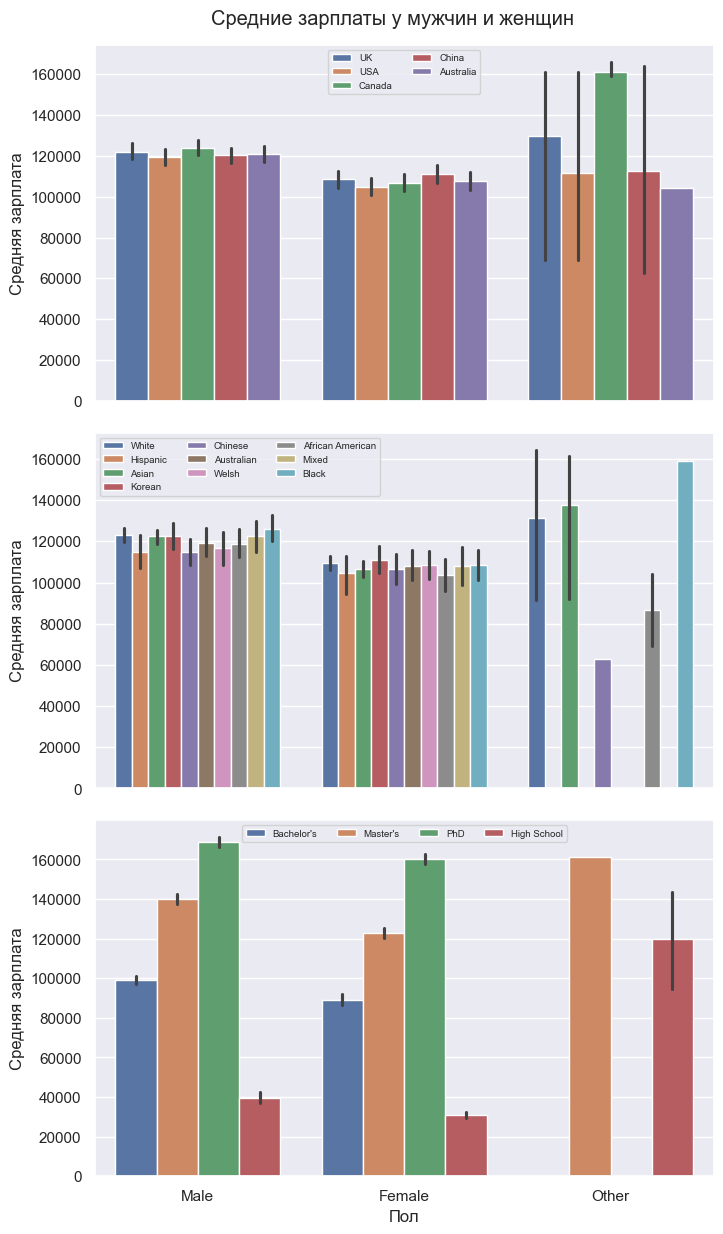

In [193]:
fig, ax = plt.subplots(3, 1, figsize = (7, 12), sharex = 'col')
fig.tight_layout()
fig.suptitle('Средние зарплаты у мужчин и женщин', y = 1.01)
ax[2].set_xlabel('Пол')
ax[0].set_ylabel('Средняя зарплата')
ax[1].set_ylabel('Средняя зарплата')
ax[2].set_ylabel('Средняя зарплата')
sns.barplot(data = sal_edt_df, x = 'Gender', y = 'Salary', hue = 'Country', legend = True, ax = ax[0])
sns.barplot(data = sal_edt_df, x = 'Gender', y = 'Salary', hue = 'Race', legend = True, ax = ax[1])
sns.barplot(data = sal_edt_df, x = 'Gender', y = 'Salary', hue = 'Education Level', legend = True, ax = ax[2])
ax[0].legend(loc = 'upper center', ncols = 2, fontsize = 'xx-small')
ax[1].legend(loc = 'upper left', ncols = 3, fontsize = 'xx-small')
ax[2].legend(loc = 'upper center', ncols = 4, fontsize = 'xx-small')
plt.show()

Из графиков видно, что не зависимо от страны, расовой принадлежности, уровня образования средняя заработная плата у мужчин где-то на 5-10% выше, чем у женщин.

2. С увеличением возраста после 30ти лет доля женщин снижается:

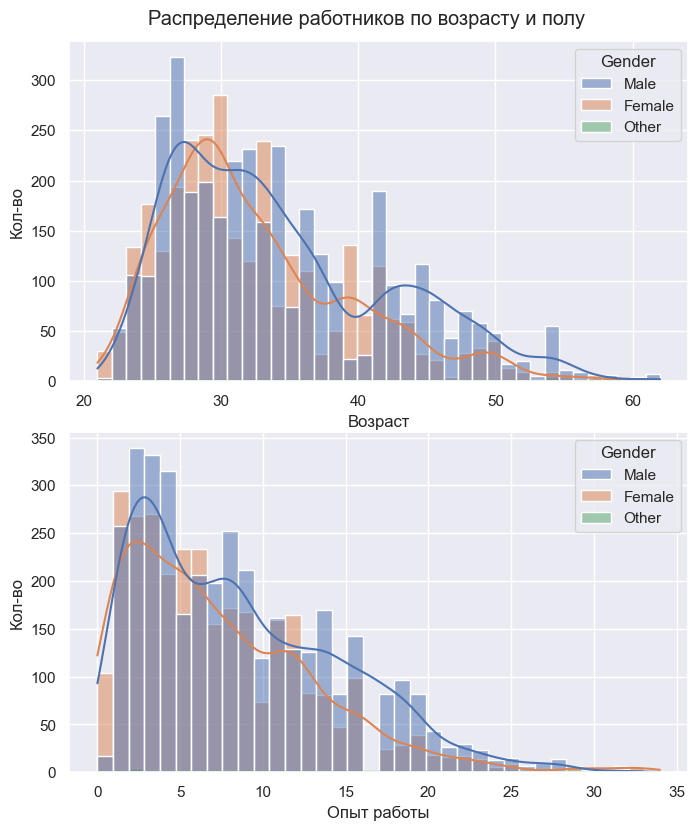

In [228]:
fig, ax = plt.subplots(2, 1, figsize = (7, 8))
fig.tight_layout()
fig.suptitle('Распределение работников по возрасту и полу', y = 1.01)
ax[0].set_xlabel('Возраст')
ax[1].set_xlabel('Опыт работы')
ax[0].set_ylabel('Кол-во')
ax[1].set_ylabel('Кол-во')
sns.histplot(data = sal_edt_df, x = 'Age', hue = 'Gender', kde = True, ax = ax[0])
sns.histplot(data = sal_edt_df, x = 'Years of Experience', hue = 'Gender', kde = True, ax = ax[1])
plt.show()

3. Заработную плату более 200K получают в основном кандидаты наук:

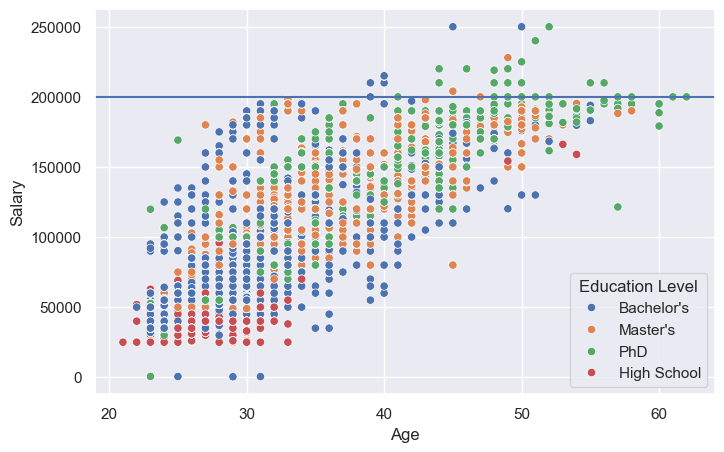

In [261]:
plt.figure(figsize=[8,5])
sns.scatterplot(data = sal_edt_df, x = 'Age', y = 'Salary', hue = 'Education Level')
plt.axhline(y = 200*10**3)
plt.show()